# Lecture 17: The Seismic Cycle I: Nucleation
## GEO 371T/391: Earthquakes
### Prof. Daniel Trugman, 2021

In [1]:
### Import General Python Packages

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,10

# Overview

Today's lecture focuses on one of the most fundamental and important questions in earthquake science: how do earthquakes get started? The earthquake nucleation process describes the physical changes a fault system undergoes as it transitions from its long-term, quasi-steady-state interseismic behavior to the initiation of dynamic rupture at high slip speeds. A solid physical understanding of the nucleation process is crucial for developing self-consistent models of the earthquake There are a number of existing conceptual paradigms for how nucleation might occur, and observations from the lab to the field scale provide some semblance of support. While it is clear that we have learned a lot about nucleation over the past several decades, it is also abundantly clear that there is much yet to learn. This is a very active area of research in seismology today, and is likely to remain so in the years to come.

In this notebook, we explore simplified models and observations of the nucleation process, keeping in mind present limitations. We will solve a simple stability analysis problem to "see the math" behind the notion of a critical nucleation length scale $L_c$. This concept underpins the Rate-and-State frictional model of nucleation, which gives us a quantitative perspective of the system as it approaches failure. We will then transition from the lab and models to the field, where we'll discuss observational constraints on nucleation length scales and precursory strains.

## Example 1: Critical Stiffness and Length Scale

In Lecture, we discussed the concept of the critical length scale for earthquake nucleation. We presented some formulas for this and discussed the idea at an intuitive level. But what is the underlying physical basis of the critical length scale? I don't find the derivation in the readings to be particularly transparent, so let's derive some key relations here. The discussion below is inspired by Chapter 11 of Paul Segall's now-classic (2011) text _Earthquake and Volcano Deformation_.

---

We can gain insight by studying the dynamical, differential equations governing fault friction. One approach to this problem considers a linear stability analysis for a block-slider model.

For systems of this type, the dynamical equation force balance between the loading and frictional resistance. For a loading velocity $v^{\infty}$, mass $m$, spring constant $k$, and slip $\delta$:

\begin{equation}
k (v^{\infty}t - \delta) - f(\dot{\delta},\theta) \, \sigma = m \ddot{\delta}.
\end{equation}

Here $f(\dot{\delta},\theta)$ is a rate-and-state frictional model of the form:
\begin{equation}
f = f_0 + a \log \left (\frac{\dot{\delta}}{\dot{\delta}_0} \right) + b \log \left( \frac{\theta \dot{\delta}_0}{D_c} \right).
\end{equation}

[We are using $f$ instead of $\mu$ here to avoid confusion with the shear modulus].

---

The formulation above includes the full inertial term $m \ddot{\delta}$. This is neglected entirely for a steady-state problem ($\ddot{\delta} \sim 0$), which can be a decent way to attack the problem.

Another approach that is often used to approximate the effects of inertia without all of its inherent numerical difficulties is called the _radiation damping approximation_:

\begin{equation}
k (v^{\infty}t - \delta) - f(\dot{\delta},\theta) \, \sigma = \eta \dot{\delta},
\end{equation}

where $\eta = \frac{\mu}{2 v_s}$ for shear modulus and wavespeed $\mu$ and $v_s$. Conceptually, this term approximates the stress released via seismic waves (e.g. Segall, 2011):

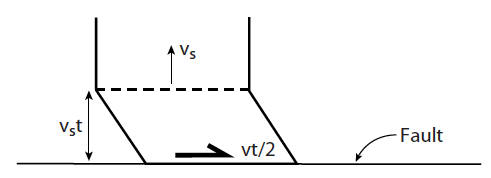

---

If we rewrite the equations of motion in terms of velocity $v = \dot{\delta}$ and take the time derivative, we have:

\begin{equation}
k (v^{\infty} - v) - \sigma \frac{\partial}{\partial t} \left[ f_0 + a \log \left (\frac{v}{v_0} \right) + b \log \left( \frac{\theta v_0}{D_c} \right) \right] = \eta \dot{v}
\end{equation}

---

Noting that:

\begin{equation}
\frac{\partial}{\partial t} a \log \left (\frac{v}{v_0} \right) = \frac{a \dot{v}}{v} 
\end{equation}

and

\begin{equation}
\frac{\partial}{\partial t} b \log \left (\frac{\theta v_0}{D_c} \right) = \frac{b \dot{\theta}}{\theta} 
\end{equation}

we have

\begin{equation}
k (v^{\infty} - v) - \sigma \left[ \frac{a \dot{v}}{v} + \frac{b \dot{\theta}}{\theta} \right] = \eta \dot{v}.
\end{equation}

---

To proceed, we need coupled, first order differential equations for the dynamic variables $v$ and $\theta$. Solving for $\dot{v}$, we arrive at:

\begin{equation}
\dot{v} = \left(\frac{\eta}{\sigma} + \frac{a}{v} \right)^{-1} \left( \frac{\dot{\tau}}{\sigma} - \frac{b \dot{\theta}}{\theta} \right),
\end{equation}

where the stressing rate $\dot{\tau} = k (v^{\infty} - v)$ comes from loading term.

---

State evolves either via the Dieterich aging law:
    
\begin{equation}
\dot{\theta} = 1 - \frac{\theta v}{D_c}
\end{equation}

or Ruina slip law:

\begin{equation}
\dot{\theta} = - \frac{\theta v}{D_c} \log \left( \frac{\theta v}{D_c} \right)
\end{equation}

---

For the purposes of studying nucleation, it is reasonable to neglect the radiation damping term (which will only become important once rupture commences). However, it is also reasonable to assume a "no-healing limit" where $\theta v /D_c << 1$ for most (if not all) of the nucleation process, as slip speeds will well exceed the steady state loading velocity ($v >> v^{\infty}$). 

Under these assumptions, state-evolution can be approximated as $\dot{\theta}/\theta = -v/D_c$, and the equations reduce to:

\begin{equation}
\dot{v} = \frac{v^2}{a} \left( \frac{b}{D_c} - \frac{k}{\sigma} \right)
\end{equation}

---

This equation defines a critical stiffness

\begin{equation}
k_c = \frac{b \sigma}{D_c}.
\end{equation}


For $k>k_c$, the system is stable (steady sliding), while for $k<k_c$, earthquake-like instabilities are possible.

---

The critical length scale is related to this stiffness through the shear modulus as $L_c \sim \mu \, / \, k_c$ with a constant of proportionality of order 1.

A more detailed calculation (Rubin and Ampuero, 2005) gives:

\begin{equation}
L_c = \frac{\pi}{4} \frac{\mu D_c}{b \sigma}.
\end{equation}

Conceptually, for $L < L_c$ the system is too stiff to nucleate an instability.

## Example 2: Time to Failure

During the nucleation process, aseismic slip occurs within the nucleation zone defined by $L_c$, accelerating as failure approaches. We can study this process by considering the differential equation we derived above:

\begin{equation}
\dot{v} = \frac{v^2}{a} \left( \frac{b}{D_c} - \frac{k}{\sigma} \right)
\end{equation}

---

Let $H = (b/D_c - k/\sigma)$, the term in parentheses above. The we have a differential equation of the form:

\begin{equation}
\frac{d v}{dt} = \frac{H}{a} v^2
\end{equation}

Integrating from an initial condition $v=v_0$ at $t = 0$:

\begin{equation}
\int_{v_0}^v \frac{dv'}{v'^2} = \int_0^t \frac{H}{a},
\end{equation}

which gives: 

\begin{equation}
\frac{v}{v_0} = \frac{1}{1 - H v_0 t \, / \, a}
\end{equation}

---

Notice from this equation that in this model, slip speed becomes infinite at a time:

\begin{equation}
t_{inst} = \frac{a}{H v_0}
\end{equation}

This is obviously unphysical, and is a byproduct of the fact that we ignored inertial effects. Still, this basic functional form is a good approximation for much of the nucleation process.

---

We can also integrate this equation with respect to time to get the slip $s$:
  
\begin{equation}
s(t) = \int_0^t v(t') dt' = \int_0^t \frac{v_0}{1 - H v_0 t \, / \, a}
\end{equation}

which has a logarithmic functional form:

\begin{equation}
s(t) = - \frac{a}{H} \log \left(1 - \frac{t}{t_{inst}} \right)
\end{equation}

---

Note that in the no-healing limit assumed above, the state varable evolves exponentially with slip: $\theta = \theta_0 \exp(-s/D_c)$.

We can visualize the basic functional forms for slip and slip rate as follows. A ballpark approximation of $H \approx \frac{a}{D_c}$ pertains to near-critical stiffness: $k \sim k_c$. In this case:

\begin{equation}
s(t) = -D_c \log \left(1 - \frac{t}{t_{inst}} \right)
\end{equation}

\begin{equation}
v(t) = \frac{v_0}{1 - t \, / \, t_{inst}}
\end{equation}

\begin{equation}
t_{inst} = D_c \, / \, v_0
\end{equation}

<ipython-input-2-fdb7248155d3>:18: RuntimeWarning: divide by zero encountered in log
  st = -Dc*np.log(1-tt/tI)
<ipython-input-2-fdb7248155d3>:21: RuntimeWarning: divide by zero encountered in true_divide
  vt = v0/(1-tt/tI)


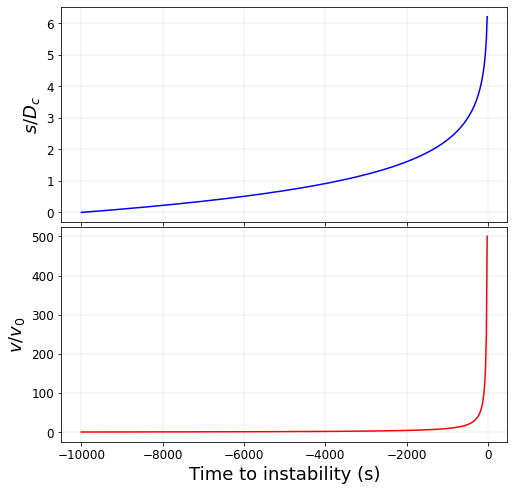

In [2]:
### Plot nucleation results

# set parameters
v0 = 1.0e-9 # m/s (plate rate)
Dc = 10.0e-6 # m (lab value)

# instability time
tI = Dc/v0

# figure setup
fig, axi = plt.subplots(2,1,sharex=True,figsize=(8,8))
fig.subplots_adjust(hspace=0.02)

# times
tt = np.linspace(0,tI,501)

# slip
st = -Dc*np.log(1-tt/tI)

# slip rate
vt = v0/(1-tt/tI)

# plot
axi[0].plot(tt-tI,st/Dc,'-b')
axi[1].plot(tt-tI,vt/v0,'-r')

# format plot
fig.subplots_adjust(hspace=0.02)
axi[1].set_xlabel("Time to instability (s)",fontsize=18)
axi[0].set_ylabel("$s/D_c$",fontsize=18)
axi[1].set_ylabel("$v/v_0$",fontsize=18)
for ax in axi:
    ax.tick_params(labelsize=12)
    ax.grid(lw=0.2)

# show plot
plt.show()
plt.close()



You can see that in both cases, things really accelerate as instability approaches, an effect that is more exaggerated in slip rate (red) rather than slip (blue). When we say instability here, we really mean it, as the function becomes singular at the end [hence the runtime warning].

Note that this solution assumes only the background loading rate, not a more complex stress history. We will study that in greater detail during the following lesson on earthquake triggering.

# HOMEWORK

## Problem 1: $L_C$ and Earthquake Magnitude

**Question 1(a)**

While regional seismic networks (e.g., TexNet) have nominal magnitude of completion of order $M_W$ 2, smaller events of order $M_W$ -1 or less have been detected in detailed local catalogs, e.g. those obtained from template matching or machine learning algorithms. 

What is a ballpark approximation for the fault radius for an earthquake of this size? State and justify any assumptions you are making.

<font color='blue'>

**ANSWER**

For a circular crack, the fault radius $r$ is related to the moment $M_0$ and stress drop $\Delta \sigma$ as:
    
\begin{equation}
\Delta \sigma = \frac{7}{16} \frac{M_0}{r^3}.
\end{equation}
    
Solving for $a$ we have
    
\begin{equation}
r= \left(\frac{7}{16} \frac{M_0}{\Delta \sigma}\right)^{1/3}.
\end{equation}


Moment magnitude $M_W$ is given by

\begin{equation}
M_W = \frac{2}{3}(\log_{10} M_0 - 9.1),
\end{equation}

so $M_W$ = -1 corresponds to $\approx$ 3.98 x $10^7$ Nm.

For a nominal stress drop of 3 MPa, the source radius is 1.8 meters.

See calculations below.

</font>

In [2]:
### Calculations

# compute moment
Mw = -1.0
M0 = 10.0**(1.5*Mw + 9.1)
print("M0 = %.2e" %M0)

# compute radius
stress = 3.0e6
r = (7.0/16.0*M0/stress)**(1/3)
print("r = %.2f" %r)


M0 = 3.98e+07
r = 1.80


**Question 1(b)**

Since we can observe earthquakes of this size (or smaller), what does this imply about $L_c$? If we assume $b$ = 0.01 and $\sigma$ = 100 MPa, what does this imply about the value of $D_c$? Is this answer consistent with observations of $D_c$ from lab experiments?

<font color='blue'>

**ANSWER**

The observed radius $r$ suggests $L_c \leq r$. 
    
We have:
    
\begin{equation}
r \geq L_c = \frac{\pi}{4} \frac{\mu D_c}{b \sigma}.
\end{equation}
    
Solving for $D_c$ we have:
    
\begin{equation}
D_c \leq \frac{4}{\pi} \frac{b \sigma}{\mu} r.
\end{equation}
    
It is instructive to plug in numbers. Let's say $b$ = 0.01,  $\sigma$ = 100 MPa, $\mu$ = 30 GPa.
    
Then 

\begin{equation}
D_c \leq \frac{4}{\pi} \left( \frac{0.01 x 100 \, MPa}{30000 \, MPa} \right) 1.80 \, m \approx 76 \, \mu m
\end{equation}

This value is actually in reasonably good agreement with results from laboratory friction experiments. Of course $\sigma$ and $b$ are not constants in the real Earth but depend on in-situ conditions.
    
</font>

**Question 1(c)**

Do you think $M_W \sim -1$ is a good estimate of a true minimum magnitude or lower bound for earthquake size in the Earth? Why or why not? If so or if not, what does this imply about $L_c$ and $D_c$? 

<font color='blue'>

**ANSWER**

No, it is likely that smaller earthquakes exist. Indeed, detailed microseismic analyses find smaller events all of the time. Thus, $L_c$ is likely smaller, as is $D_c$. Of course, there is going to be a lot of variability across fault zones. And these basic frictional and nucleation models may not reflect the actual nucleation process of real earthquakes, small or large.
 

</font>

## Problem 2: Observing "Precursory" Nucleation Strain

Nucleation requires aseismic slip on a fault plane of length scale ~ $L_c$ before dynamic rupture can initiate. This leads to the tantalizing possibility that one might observe this precursory strain transient before an earthquake gets started and hence predict its occurrence in advance. This exercise studies this possibility in detail. 

**Question 2(a)**

Assume a fault slipping at a plate rate of order $v_0 \approx 10^{-9}$ m/s and has a value of $D_c$ of 10 $\mu$m. In this case, what is the approximate time to instability in hours? 

[Note that based on our discussion in Example 2, we likely will have less time than this before anything becomes detectable.]

<font color='blue'>

**ANSWER**

Here, we are just plugging in formulas from above:
    
\begin{equation}
s(t) = -D_c \log \left(1 - \frac{t}{t_{inst}} \right)
\end{equation}

\begin{equation}
v(t) = \frac{v_0}{1 - t \, / \, t_{inst}}
\end{equation}

\begin{equation}
t_{inst} = D_c \, / \, v_0
\end{equation}
    
Thus $t_{inst}$ = $10^{-5}$ m / $10^{-9}$ m/s = $10^5$ s $\approx$ 2.8 hours.

This is somewhat promising, as it gives a couple of hours of warning to catch an earthquake on the way. However, as we saw in Example 2, we may need to wait until very late in the nucleation process to see anything detectable.
   
</font>

**Question 2(b)**

For a vertical, strike-slip fault at depth $d$, the strain $e$ observed at the surface scales as:

\begin{equation}
e(t) = \frac{s(t) A}{8 \pi d^3},
\end{equation}

where $A$ is the fault area. 

For a simple first-order approximation, you may assume $A \sim \pi {L_c}^2$. 

* If $D_c$ = 10 $\mu$m, $b$ = 0.01,  $\sigma$ = 100 MPa, $\mu = 30$ GPa, what is $L_c$?
* If $d$ = 10 km, what is the observed strain at 100s, 10s, and 1s before instability? 
* What do your results imply about the feasibility of earthquake prediction from nucleation precursors?


<font color='blue'>

**ANSWER**
   
---    
    
* Assuming $D_c$ = 10 $\mu$m, $b$ = 0.01,  $\sigma$ = 100 MPa, $\mu = 30$ GPa, we use the formula: 

\begin{equation}
L_c = \frac{\pi}{4} \frac{\mu D_c}{b \sigma}
\end{equation}
    
giving $L_c \approx$ 0.24 m.
    
---
    
* Slip evolves as:
    
\begin{equation}
s(t) = -D_c \log \left(1 - \frac{t}{t_{inst}} \right)
\end{equation}
      
So strain evolves as:
    
\begin{equation}
e(t) =  -\frac{D_c A}{8 \pi d^3} \log \left(1 - \frac{t}{t_{inst}} \right) = -\frac{D_c L_c^2}{8 d^3} \log \left(1 - \frac{t}{t_{inst}} \right)
\end{equation}
    
The strain is highest just before nucleation, with values of order $10^{-18}$ or $10^{-19}$.
 
---
    
* These strain values are tiny, likely below any detectable threshold. Thus we are out of luck in predicting earthquakes from strain precursors of this type.

</font>

In [5]:
### Calculations for the above

# 1. Lc
b = 0.01 # frictional parameter
sigma = 100.0 # stress in MPa
mu = 30.0e3 # shear modulus in MPa
Dc = 10.0e-6 # Dc in meters
Lc = (np.pi/4.0)*(mu*Dc)/(b*sigma)
print("Lc = %.2f" %Lc)

# strain at different times
d = 10.0e3 # depth in meters
tI = 1.0e4 # instability time in seconds
for tt in [100.0, 10.0, 1.0]:
    strain = - (Dc*(Lc**2))/(8*(d**3))*np.log(1-(tI-tt)/tI)
    print("At t = %3.0fs to instability, strain = %.2e" %(tt,strain))

Lc = 0.24
At t = 100s to instability, strain = 3.20e-19
At t =  10s to instability, strain = 4.79e-19
At t =   1s to instability, strain = 6.39e-19
